# Problem 1

## (a)

In [1]:
#(a)
import pandas as pd
import numpy as np
import math
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

autodf1 = pd.read_csv('Auto.csv', header = 0, na_values = "?")

In [18]:
autodf1['horsepower'] = autodf['horsepower'].apply(pd.to_numeric, errors = 'coerce')

In [19]:
autodf1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## (b)

<IPython.core.display.Javascript object>


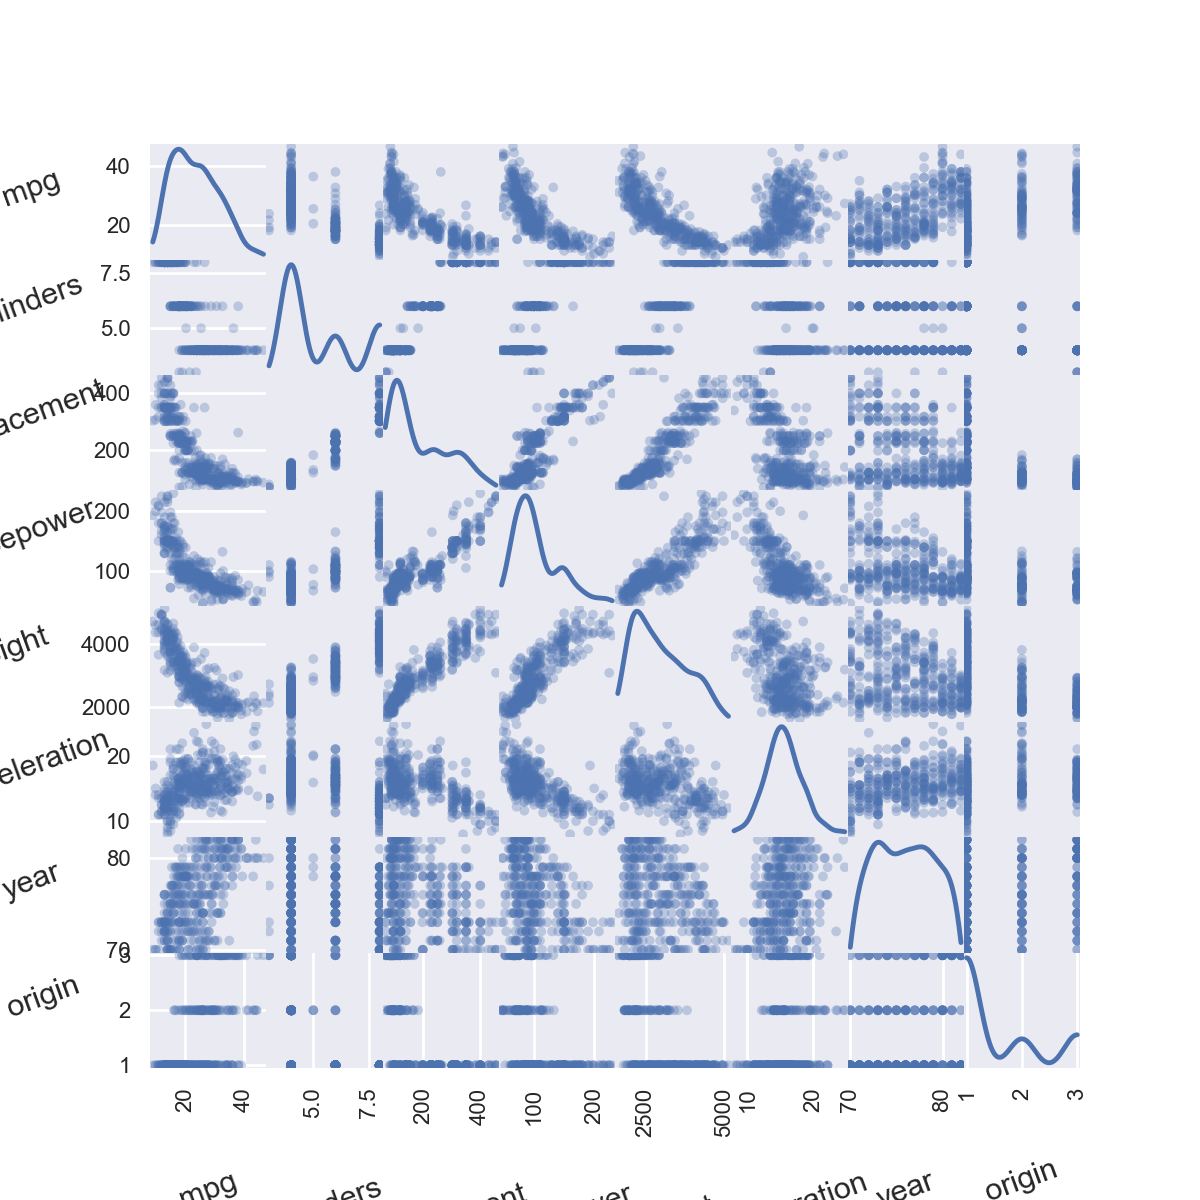

In [20]:
#(b)
autodf = autodf1.drop(['name'], axis = 1)
scatter1 = scatter_matrix(autodf, alpha=0.3, figsize=(6, 6),
               diagonal='kde')
for i in range(8):
    ax = scatter1[i, 0]
    ax.yaxis.label.set_rotation(20)
    ax.yaxis.labelpad = 25
    ax = scatter1[7, i]
    ax.xaxis.label.set_rotation(20)
    ax.xaxis.labelpad = 20
plt.show()

## (c)

In [21]:
autodf.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


In [22]:
autodf['constant'] = 1.0
import statsmodels.api as sm
reg1 = sm.OLS(endog=autodf['mpg'], exog=autodf[['constant', 'cylinders', 'displacement', 'horsepower', 'weight',
                                               'acceleration', 'year', 'origin']], missing='drop')


In [23]:
results1 = reg1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        09:30:08   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (i)

constant, displacement, weight, year and origin are statistically significant at the 1% level. 

### (ii)

cylinders, horsepower and acceleration are not statistically significant at the 10% level.

### (iii)

Miles per gallon is expected to increase by 0.7508 unit when year increases by 1 unit, holding other exogenuous variables constant. 

## (e)

### (i)

displacement, horsepower and acceleration appear to be non-linear.

In [24]:
autodf['displacement2'] = np.square(autodf['displacement'])
autodf['horsepower2'] = np.square(autodf['horsepower'])
autodf['acceleration2'] = np.square(autodf['acceleration'])

In [25]:
autodf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,constant,displacement2,horsepower2,acceleration2
0,18.0,8,307.0,130.0,3504,12.0,70,1,1.0,94249.0,16900.0,144.00
1,15.0,8,350.0,165.0,3693,11.5,70,1,1.0,122500.0,27225.0,132.25
2,18.0,8,318.0,150.0,3436,11.0,70,1,1.0,101124.0,22500.0,121.00
3,16.0,8,304.0,150.0,3433,12.0,70,1,1.0,92416.0,22500.0,144.00
4,17.0,8,302.0,140.0,3449,10.5,70,1,1.0,91204.0,19600.0,110.25


In [26]:
reg2 = sm.OLS(endog=autodf['mpg'], exog=autodf[['constant', 'cylinders', 'displacement', 
                                                'displacement2', 'horsepower', 'horsepower2', 
                                               'weight', 'acceleration', 'acceleration2', 'year',
                                               'origin']], missing='drop')

In [27]:
results2 = reg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     241.5
Date:                Sat, 03 Feb 2018   Prob (F-statistic):          4.05e-158
Time:                        09:33:16   Log-Likelihood:                -970.53
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     381   BIC:                             2007.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
constant          6.9847      6.004      1.163      0.245      -4.821      18.790
cylinders         0.7388      0.310      2.384      0.018       0.129       1.348
displacement     -0.0700      0.016     -4.332      0.000      -0.102      -0.038
displacement2     0.0001   2.85e-05      4.090      0.000    6.04e-05       0.000
horsepower       -0.2221      0.039     -5.638      0.000      -0.300      -0.145
horsepower2       0.0006      0.000      4.237      0.000       0.000       0.001
weight           -0.0029      0.001     -4.368      0.000      -0.004      -0.002
acceleration     -1.3518      0.538     -2.514      0.012      -2.409      -0.294
acceleration2     0.0331      0.016      2.111      0.035       0.002       0.064
year              0.7495      0.045     16.716      0.000       0.661       0.838
origin            0.5737      0.268      2.138      0.033       0.046       1.101
==============================================================================
Omnibus:                       27.998   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.858
Skew:                           0.378   Prob(JB):                     6.09e-14
Kurtosis:                       4.776   Cond. No.                     2.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (ii) 

Adjusted R-squared = 0.860

It is better than adjusted R-squared from part (d), which is 0.818. 

### (iii)

The displacement<sub>i</sub> variable becomes statistically significant at the 1% level. Its squared term is also statistically significant at the 1% level. 

### (iv)

The cylinders<sub>i</sub> was not statistically significant at the 10% level, but it becomes statistically significant at the 10% level. It is still not statistically significant at the 1% level. 

## (f)

In [28]:
const = 1
cyldr1 = 6
displcmt1 = 200
hp1 = 100
wght1 = 3100
accl1 = 15.1
yr1 = 99
org1 = 1

results2.predict(exog = [1, 6, 200, 200**2, 100, 100**2, 3100, 15.1, 15.1**2, 99, 1])

array([ 38.49803518])

The predicted mpg will be 38.498035

# Problem 2

## (a)

In [29]:
import sklearn
from sklearn import datasets, neighbors, linear_model

knn_dict = {'x1': [0, 2, 0, 0, -1, 1], 'x2': [3, 0, 1, 1, 0, 1], 
            'x3': [0, 0, 3, 2, 1, 1], 'y': ['red', 'red', 'red', 'green', 'green', 'red']}
knndf = pd.DataFrame(data = knn_dict)
knndf

,x1,x2,x3,y
0,0,3,0,red
1,2,0,0,red
2,0,1,3,red
3,0,1,2,green
4,-1,0,1,green
5,1,1,1,red


In [30]:
knndf['eucl_dist'] = np.sqrt(knndf['x1']**2 + knndf['x2']**2 + knndf['x3']**2)
knndf

,x1,x2,x3,y,eucl_dist
0,0,3,0,red,3.000000
1,2,0,0,red,2.000000
2,0,1,3,red,3.162278
3,0,1,2,green,2.236068
4,-1,0,1,green,1.414214
5,1,1,1,red,1.732051


## (b)

k = 1, we choose the point which is the closest to the test point, which is the point on row 4 (1.414).
It is green. 
Therefore, we predict the point as green. 

## (c)

k = 3, we choose the 3 nearest point (rows 4, 5, and 1, 1.414, 1.732, and 2.000 respectively). 
Two of them are red and one of them is green. 
Therefore, we predict the point as red. 

## (d)

We would expect the K value to be small. 
The predicted boundary should allow for larger variance and smaller bias. It will be less smooth. Therefore, a smaller K will be better. 

## (e)

In [31]:
x = np.column_stack((knndf['x1'], knndf['x2'], knndf['x3']))
y = knndf['y']
knn_clsf = neighbors.KNeighborsClassifier(n_neighbors=2)
results3 = knn_clsf.fit(x, y)

In [33]:
results3.predict([(1, 1, 1)])

array(['green'], dtype=object)

In [34]:
knn_clsf.kneighbors([[1, 1, 1]])

(array([[ 0.        ,  1.41421356]]), array([[5, 3]]))

The predicted result using classifier is green. However, K = 2, the nearest two points have different colors, and the closest point is the 6th point on row 5 (1,1,1), which is red. 

# Problem 3



In [35]:
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [41]:
mpg_median = autodf['mpg'].median()
autodf['mpg_high'] = autodf['mpg'] >= mpg_median
autodf['mpg_high'] = autodf['mpg_high'].astype(int)

In [42]:
autodf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,constant,displacement2,horsepower2,acceleration2,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,1.0,94249.0,16900.0,144.00,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1.0,122500.0,27225.0,132.25,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1.0,101124.0,22500.0,121.00,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1.0,92416.0,22500.0,144.00,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1.0,91204.0,19600.0,110.25,0


In [44]:
LogitModel = sm.Logit(endog = autodf['mpg_high'], 
                      exog = autodf[['constant', 'cylinders', 'displacement', 
                                   'horsepower', 'weight', 'acceleration', 
                                   'year', 'origin']], missing = 'drop')

result_logit = LogitModel.fit()
result_logit.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sat, 03 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        15:34:29   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
constant       -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Constant, weight, and year have coefficient that are statistically significant at the 5% level. 

## (b)


In [102]:
autodf = autodf.dropna(axis = 0, how = 'any')
X = ['constant', 'cylinders', 'displacement', 'horsepower', 
          'weight', 'acceleration', 'year', 'origin']
X_train, X_test, y_train, y_test = \
    train_test_split(autodf[X[1:]], autodf['mpg_high'], test_size = 0.5, random_state=10)
 

## (c)

In [103]:
LogReg2 = LogisticRegression()
LogReg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
LogReg2.coef_

array([[-0.71693631,  0.00674771, -0.03674513, -0.00506291, -0.13227429,
         0.29854697, -0.15983905]])

In [105]:
LogReg2.intercept_

array([-0.07535522])

In [106]:
b1, b2, b3, b4, b5, b6, b7 = list(LogReg2.coef_[0])
b0 = LogReg2.intercept_[0]

In [108]:
print("b0 = {}, b1 = {}, b2 = {}, b3 = {}, b4 = {},\
      b5 = {}, b6 = {}, b7 = {}".format(b0, b1, b2, b3, b4, b5, b6, b7))

b0 = -0.0753552220010036, b1 = -0.7169363126947917, b2 = 0.006747712485727237, b3 = -0.03674513486451911, b4 = -0.005062905953497064,      b5 = -0.13227428782440076, b6 = 0.29854697460289126, b7 = -0.15983904804755314


## (d)

In [ ]:
y_pred = LogReg2.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [113]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



86 and 85 are the number of correct predictions. 12 and 13 are the number of incorrect predictions. 

The model predicts low mpg and high mpg equally well, since the reported precisions are quite similar. The difference is minor. 